<a href="https://colab.research.google.com/github/phuongtung0801/DAMH_MQTT_project/blob/master/BaiTapThucHanhC4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
%matplotlib inline


In [2]:
def visualization(*args):
  num_x = 1 + args[2][0] + args[2][1]
  if (len(args) >= 4):
    fig, axes = plt.subplots(num_x, len(args[0]), figsize = (args[3][0], args[3][1]))
  else:
    fig, axes = plt.subplots(num_x, len(args[0]), figsize = (5*len(args[0]), 5*num_x))
  for i in range(len(args[0])):
    j = 0
    axes[j][i].imshow(args[0][i], cmap='gray', vmin=0, vmax=255)
    if args[2][0] == 1:
      j += 1
      axes[j][i].hist(args[0][i].ravel(), 256, [0,256], label = 'PDF') 
      if args[2][2] == 1:
        ax2 = axes[j][i].twinx()
        ax2.hist(args[0][i].ravel(), 256, [0,265], cumulative = True, histtype = 'step', color = 'red', label = 'CDF')
      axes[j][i].set_title('Histogram - CDF')
    if args[2][1] == 1:
      j += 1
      f = np.fft.fft2(args[0][i])
      fshift = np.fft.fftshift(f)
      magnitude_spectrum = 20*np.log(np.abs(fshift))
      axes[j][i].imshow(magtitude_spectrum, cmap='gray')
    if (len(args) >= 2):
      j = 0
      axes[0][i].set_title(args[1][i])
      if args[2][0] == 1:
        j += 1
        axes[j][i].set_title('Histogram ' + args[1][i])
      if args[2][1] == 1:
        j += 1
        axes[j][i].set_title('Spectrum ' + args[1][i])
  fig.tight_layout()


**PADDING**

In [ ]:

img_gray = cv2.imread("tuong.jpg",0) #img xam chi co 2 chieu x,y
constant = np.pad(img, ((101,101), (101,101)), 'constant') #mo rong anh theo 2 chieu voi muc mo rong la 101
reflect = np.pad(img, ((101,101), (101,101)), 'reflect')
wrap = np.pad(img, ((101,101), (101,101)), 'wrap')
edge = np.pad(img, ((101,101), (101,101)), 'edge')

visualization([img_gray, constant, reflect, wrap, edge], ['Color', 'Original', 'Constant', 'Reflect', 'Wrap', 'Edge'], [1,0,1])




**Noise**


**Gaussian**

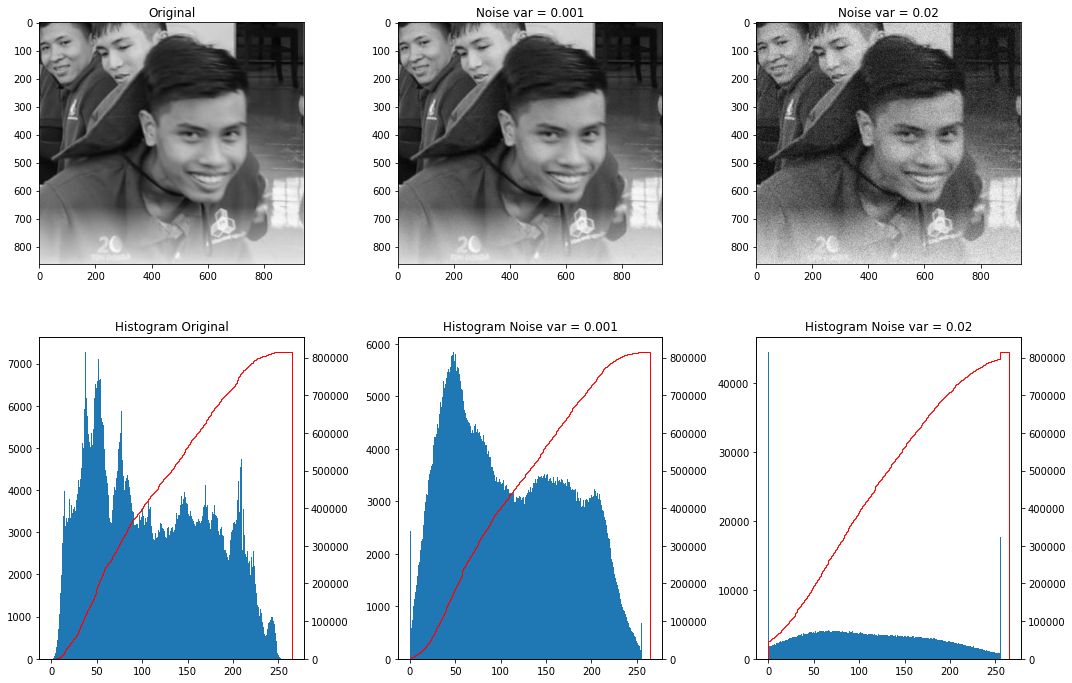

In [32]:
noise_img1 = random_noise(img_gray, mode='gaussian', mean=0, var=0.001)
noise_img1 = np.array(255*noise_img1, dtype='uint8') 

noise_img2 = random_noise(img_gray, mode='gaussian', mean=0, var=0.02)
noise_img2 = np.array(255*noise_img2, dtype='uint8')

visualization([img_gray, noise_img1, noise_img2], ['Original', 'Noise var = 0.001', 'Noise var = 0.02'], [1,0,1])



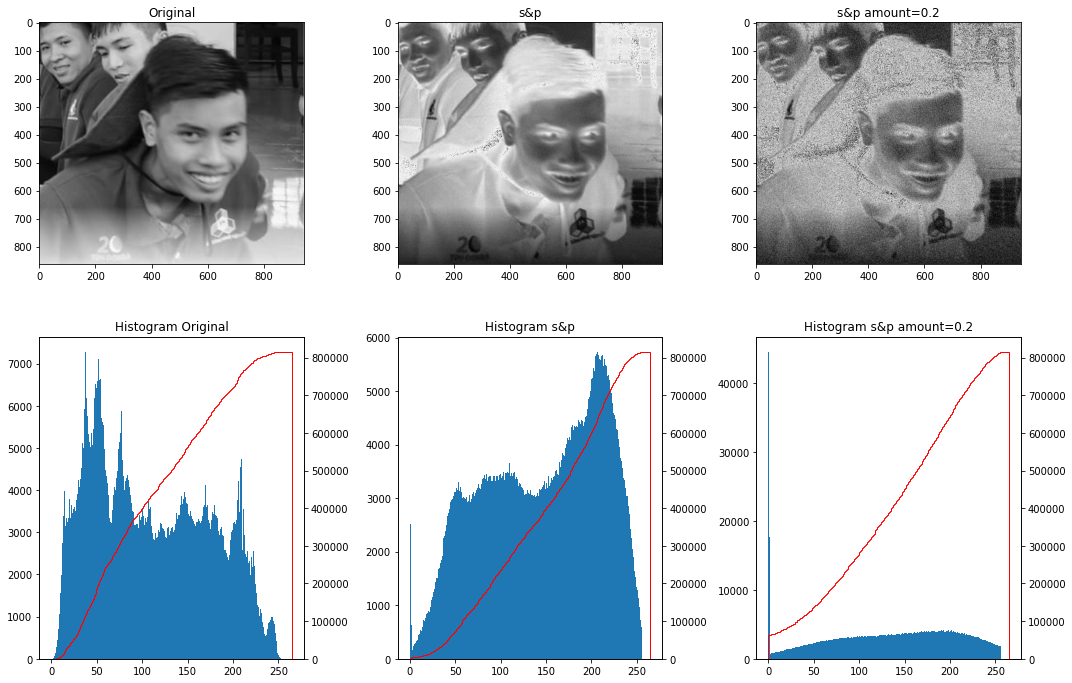

In [31]:
#Salt Pepper
noise_img3 = random_noise(img_gray, mode='s&p')
noise_img3 = np.array(255*noise_img1, dtype='uint8') 

noise_img4 = random_noise(img_gray, mode='s&p', amount=0.2)
noise_img4 = np.array(255*noise_img2, dtype='uint8')

visualization([img_gray, noise_img3, noise_img4], ['Original', 's&p', 's&p amount=0.2'], [1,0,1])


In [ ]:
#periodic noise
import math
sin_gray = img_gray.copy()
for i in range(sin_gray.shape[0]): #????
  for j in range(sin_gray.shape[1]):
    tmp = sin_gray[i, j] + math.sin(i/20 + j/20)*255/5
    if tmp > 255: tmp = 255
    elif tmp < 0: tmp = 0
    sin_gray[i, j] = tmp
sin_gray1 = np.array(sin_gray, dtype='uint8')

sin_gray = img_gray.copy()
for i in range(sin_gray.shape[0]):
  for j in range(sin_gray.shape[1]):
    tmp = sin_gray[i, j] + (math.sin(i/20 - j/20)*255 + math.cos(i/20 + j/20)*255)/8
    if tmp > 255: tmp = 255
    elif tmp < 0: tmp = 0
    sin_gray[i, j] = tmp
sin_gray2 = np.array(sin_gray, dtype='uint8')
visualization([img_gray, sin_gray1, sin_gray2], ['Original', 'sin1', 'sin2'], [1,0,1])



In [ ]:
#smoothing filter

blur = cv2.blur(img_gray, (5,5)) #5x5 la do rong cua filter
visualization([img_gray, blur], ['Original', 'Blur Filter'], [1,0,1])

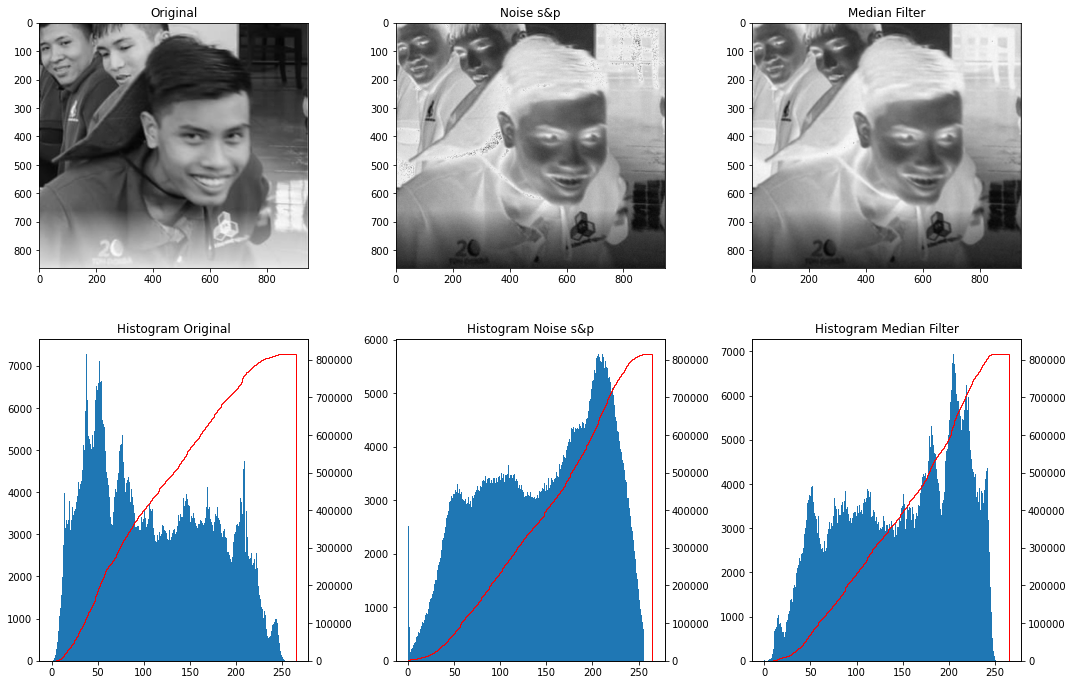

In [30]:
#median filter
# noise_img3 = random_noise(img_gray, mode='s&p')
# noise_img3 = np.array(255*noise_img1, dtype='uint8') 
median = cv2.medianBlur(noise_img3,5)

visualization([img_gray, noise_img3, median], ['Original', 'Noise s&p', 'Median Filter'], [1,0,1])

